# Practice 2

In [282]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# 固定隨機數種子
np.random.seed(0)


In [283]:
data = np.random.normal(0, 1, 500)

In [284]:
#計算每個點的卡方值(自由度=1)
chisqr = (data - 0)**2 / 1  # μ=0, σ=1

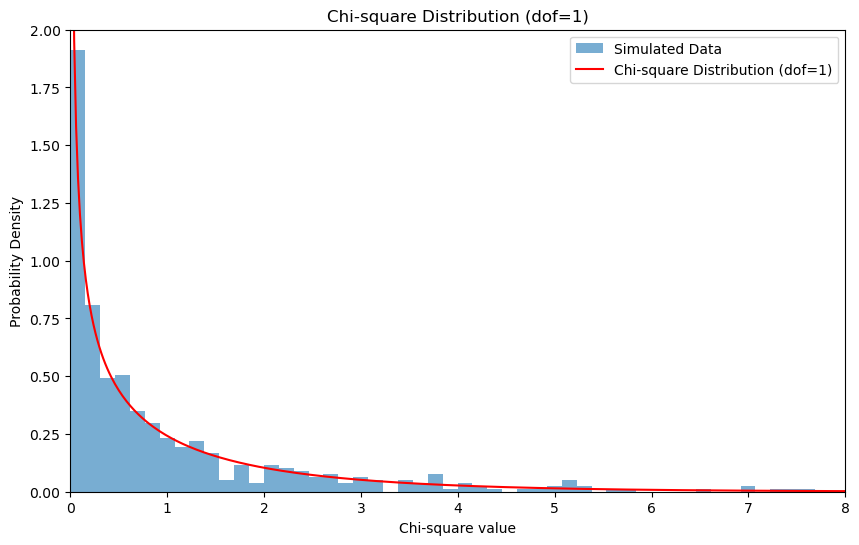

In [285]:
#畫直方圖
plt.figure(figsize=(10, 6))
plt.hist(chisqr, bins=50, density=True, alpha=0.6, label='Simulated Data')

#畫理論自由度1的卡方分布
x_vals = np.linspace(0, 10, 500)
plt.plot(x_vals, chi2.pdf(x_vals, df=1), label='Chi-square Distribution (dof=1)', color='red')

plt.xlim(left=0, right=8)
plt.ylim(bottom=0, top=2)
plt.xlabel('Chi-square value')
plt.ylabel('Probability Density')
plt.title('Chi-square Distribution (dof=1)')
plt.legend()
plt.savefig('./fig/output_2_1.pdf', transparent=True)
plt.show()

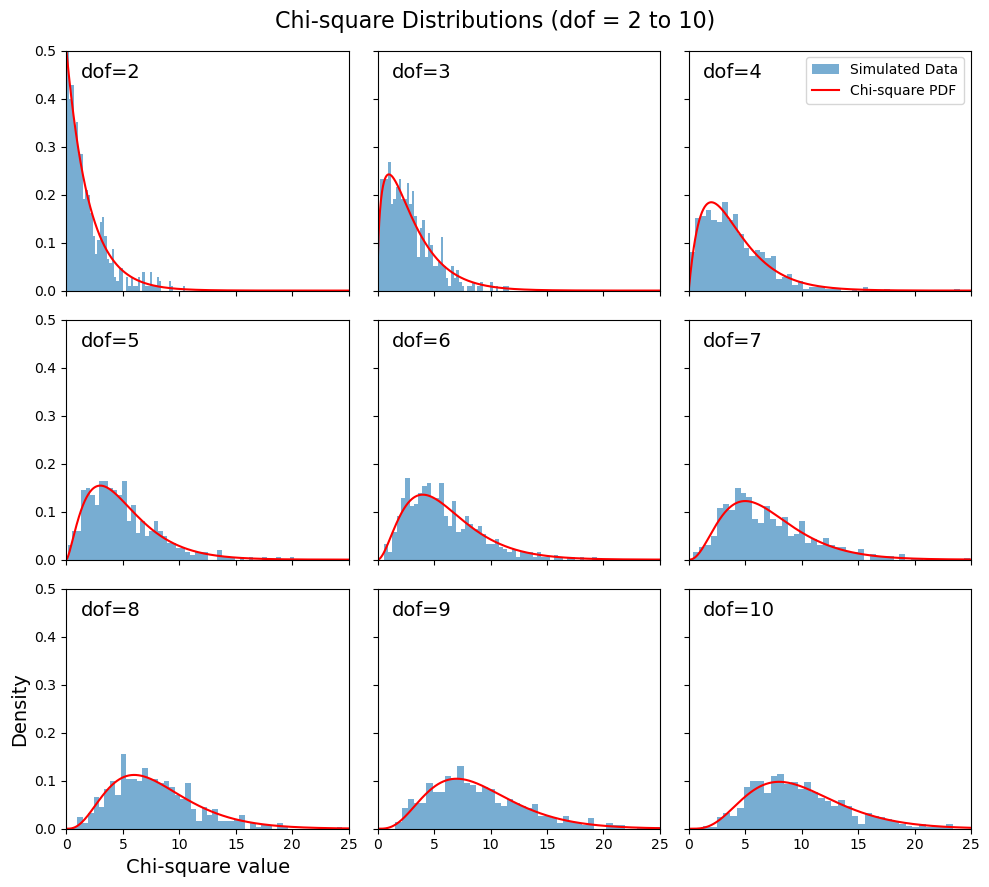

In [286]:
# 設定自由度範圍
dofs = range(2, 11)
# 建立subplots 3*3
fig, axes = plt.subplots(3, 3, figsize=(10, 9), sharex=True, sharey=True)
# 調整子圖間距
plt.subplots_adjust(left=0.03, right=0.97, top=0.95, bottom=0.05, wspace=-0.1, hspace=-0.1)
x_vals = np.linspace(0, 30, 1000)
# 遍歷每個自由度與子圖
for idx, dof in enumerate(dofs):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
 
    # 模擬卡方資料
    sum_chisqr = np.zeros(500)
    for _ in range(dof):
        data = np.random.normal(0, 1, 500)
        sum_chisqr += data**2

    # 畫直方圖
    ax.hist(sum_chisqr, bins=50, density=True, alpha=0.6, label='Simulated Data')
    # 畫理論曲線
    ax.plot(x_vals, chi2.pdf(x_vals, df=dof), color='red', label='Chi-square PDF')
    ax.text(0.05, 0.95, f'dof={dof}', transform=ax.transAxes, fontsize=14, 
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    ax.set_xlim(0, 25)
    ax.set_ylim(0, 0.5)
    # ax.set_title(f'dof = {dof}')
    if dof == 4:
        ax.legend()
    if dof == 8:
        ax.set_xlabel('Chi-square value', fontsize=14)
        ax.set_ylabel('Density', fontsize=14)

plt.suptitle('Chi-square Distributions (dof = 2 to 10)', fontsize=16)
plt.tight_layout()  # 調整 layout 以容納 suptitle
plt.savefig('./fig/output_2_2.pdf', transparent=True)
plt.show()




